# Projeto de Visualização de Dados de E-commerce


## Bibliotecas

In [71]:
!pip install unidecode

In [72]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder

## Importação e Análise Exploratória dos Dados

Carregamento dos dados e análise inicial para entender a estrutura, identificar valores nulos e explorar distribuições básicas.

In [73]:
# Importação dos dados
caminho = '/content/ecommerce_preparados.csv'
df = pd.read_csv(caminho)
pd.set_option('display.max_colwidth',20)
df.head(10)

,Unnamed: 0,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,Review3,Qtd_Vendidos,Preço,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
0,0,Pijama Cirurgico...,4.0,273.0,NaN,toronto uniforme...,poliéster,Sem gênero,não definido,"Preço justo , be...","Tamanho bom, cos...","Muito bom, só po...",+1000,69.90,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,1,Kit 10 Cuecas Bo...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são bo...,Pelo preço promo...,Serviram muito b...,+10mil,232.89,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,2,Kit Com 10 Cueca...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e...,Vendo comentário...,Produto não é ne...,+50mil,199.90,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,3,Kit 10 Cuecas Bo...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,As cuecas são bo...,E o tamanho cert...,Produto não pare...,+10mil,229.39,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,4,Kit 3 Short Jean...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada ...,"Recomendo, tecid...",Gostei muito dos...,+1000,129.20,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466
5,5,Blusa + Calça Té...,4.7,58.0,5.0,roupa zero grau,termico unissex,Sem gênero infantil,outono/inverno,"Produto ótimo , ...",Produto de boa q...,Super quentinho....,+100,78.03,0.888889,0.006280,0.000000,0.114508,669,166,3,100.0,0.002274,0.000910
6,6,Calça Jeans Levi...,4.9,14.0,NaN,levi's,algodao/elastano,Masculino,outono/inverno,Excelente calça!...,"Ótimo produto, p...","Linda, veste per...",+100,NaN,0.962963,0.001432,NaN,NaN,436,24,3,100.0,0.009095,0.000910
7,7,Roupa Apicultor ...,4.5,11.0,NaN,sr apicultura,poliamida,Sem gênero,não definido,Um dos melhores ...,Muito bom excele...,Ótimo produto.,+50,460.90,0.814815,0.001102,NaN,0.767402,731,116,1,50.0,0.005002,0.019554
8,8,Calça Levis Jean...,4.3,52.0,NaN,levi's,algodão e elastano,Masculino,outono/inverno,Etiquetas e ades...,Caimento bom. As...,Tenho duvidas se...,+500,NaN,0.740741,0.005619,NaN,NaN,436,31,3,NaN,0.009095,0.000910
9,9,Kit 3 Calça Masc...,4.4,1326.0,NaN,multimarcas,jeans que estica...,Masculino,primavera/verão,Boa tarde! as ca...,Sinceramente fiq...,Uso 44 e comprei...,+10mil,180.15,0.777778,0.145989,NaN,0.288650,543,85,7,10000.0,0.011824,0.002274


In [74]:
# Informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2199 non-null   int64  
 1   Título               2199 non-null   object 
 2   Nota                 1559 non-null   float64
 3   N_Avaliações         1559 non-null   float64
 4   Desconto             874 non-null    float64
 5   Marca                2199 non-null   object 
 6   Material             1332 non-null   object 
 7   Gênero               2120 non-null   object 
 8   Temporada            2199 non-null   object 
 9   Review1              1515 non-null   object 
 10  Review2              1354 non-null   object 
 11  Review3              1233 non-null   object 
 12  Qtd_Vendidos         2199 non-null   object 
 13  Preço                1964 non-null   float64
 14  Nota_MinMax          1559 non-null   float64
 15  N_Avaliações_MinMax  1559 non-null   f

In [75]:
# Estatística básica do DataFrame
df.describe()

,Unnamed: 0,Nota,N_Avaliações,Desconto,Preço,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
count,2199.000000,1559.000000,1559.000000,874.000000,1964.000000,1559.000000,1559.000000,874.000000,1964.000000,2199.000000,2199.000000,2199.000000,1973.000000,2199.000000,1332.000000
mean,1102.356526,4.560936,204.062219,15.457666,102.705713,0.837384,0.022374,0.171437,0.156587,440.440655,118.055935,3.418372,728.044602,0.006109,0.080198
std,637.791961,0.362854,578.455265,10.929166,69.976425,0.134390,0.063735,0.179167,0.119328,237.064233,60.987133,2.714090,3621.819900,0.009910,0.073812
min,0.000000,2.300000,1.000000,5.000000,10.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000455,0.000455
25%,549.500000,4.400000,8.000000,8.000000,50.192500,0.777778,0.000771,0.049180,0.067038,239.500000,62.500000,1.000000,5.000000,0.000910,0.005457
50%,1103.000000,4.600000,27.000000,11.000000,78.970000,0.851852,0.002865,0.098361,0.116111,463.000000,122.000000,3.000000,50.000000,0.001819,0.030014
75%,1654.500000,4.800000,119.500000,20.000000,139.152500,0.925926,0.013056,0.245902,0.218738,642.500000,178.000000,7.000000,100.000000,0.007731,0.176444
max,2206.000000,5.000000,9077.000000,66.000000,597.300000,1.000000,1.000000,1.000000,1.000000,841.000000,178.000000,9.000000,50000.000000,0.042292,0.176444


In [76]:
# Verificação de dados duplicados
print('Quantidade de dados duplicados:', df.duplicated().sum())

# Verificação de dados únicos
print('\nQuantidade de dados únicos:\n', df.nunique())

Quantidade de dados duplicados: 0

Quantidade de dados únicos:
 Unnamed: 0             2199
Título                 1857
Nota                     25
N_Avaliações            345
Desconto                 50
Marca                   842
Material                178
Gênero                   13
Temporada                10
Review1                1225
Review2                1086
Review3                 938
Qtd_Vendidos             14
Preço                  1033
Nota_MinMax              25
N_Avaliações_MinMax     345
Desconto_MinMax          50
Preço_MinMax           1033
Marca_Cod               842
Material_Cod            179
Temporada_Cod            10
Qtd_Vendidos_Cod         12
Marca_Freq               26
Material_Freq            20
dtype: int64


In [77]:
# Verificação de valores únicos em variáveis categóricas para posterior tratamento
print('\nDados únicos de Temporada:\n', df['Temporada'].unique())
print('\nDados únicos de Gênero:\n', df['Gênero'].unique())
print('\nDados únicos de Qtd_Vendidos:\n', df['Qtd_Vendidos'].unique())


Dados únicos de Temporada:
 ['não definido' 'outono/inverno' 'primavera/verão'
 'primavera-verão outono-inverno' '2021' 'outono-inverno'
 'primavera-verão - outono-inverno' 'primavera/verão/outono/inverno'
 'primavera/verão outono/inverno' 'primavera-verão']

Dados únicos de Gênero:
 ['Sem gênero' 'Masculino' 'Feminino' 'Sem gênero infantil' 'Meninas'
 'Bebês' 'Meninos' nan 'Unissex' 'short menina verao look mulher' 'Mulher'
 'roupa para gordinha pluss P ao 52' 'menino'
 'bermuda feminina brilho Blogueira']

Dados únicos de Qtd_Vendidos:
 ['+1000' '+10mil' '+50mil' '+100' '+50' '+500' 'Nenhum' '2' '+5' '+5mil'
 '3' '+25' '1' '4']


## Tratamento de Dados

Correção de valores nulos, inconsistências e ajustes necessários para garantir a qualidade do conjunto de dados.

In [78]:
# Seleciona colunas com dados brutos
df = df.loc[
    :, (
        'Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca',
        'Gênero', 'Temporada', 'Qtd_Vendidos', 'Preço'
    )
]

In [79]:
# Define os valores nulos em 'Desconto' como 0
df['Desconto'] = df['Desconto'].fillna(0)

# Define os valores nulos em 'genero' como 'nao informado'
df['Gênero'] = df['Gênero'].fillna('nao informado')

# Remove linhas com valores nulos em 'Nota', 'N_Avaliações' e 'Preço'
df = df.dropna(subset=['Nota', 'N_Avaliações', 'Preço'])

# Exibe contagem de valores nulos para verificar a limpeza
df.isnull().sum()

,0
Título,0
Nota,0
N_Avaliações,0
Desconto,0
Marca,0
Gênero,0
Temporada,0
Qtd_Vendidos,0
Preço,0


In [80]:
# Converte os dados da colunas de texto para letras minúsculas e sem caracteres especiais
df[['Título', 'Marca', 'Gênero', 'Temporada', 'Qtd_Vendidos']] = (
    df[['Título', 'Marca', 'Gênero', 'Temporada', 'Qtd_Vendidos']]
    .map(lambda x: unidecode(str(x).lower()))
)

# Padroniza títulos das colunas, convertendo para letras minúsculas e removendo caracteres especiais
df.columns = [unidecode(col).lower() for col in df.columns]

In [81]:
# Substituições e padronizações na coluna 'temporada'
df['temporada'] = df['temporada'].apply(
    lambda x: 'nao definido' if x == '2021'
    else re.sub(r'/+', '/', re.sub(r'[- ]', '/', x))
    if x != 'nao definido'
    else x
)

# Padroniza valores com o mesmo significado em 'genero'
substituicoes_gen = {
    'sem genero': 'unissex',
    'sem genero infantil': 'unissex infantil',
    'menino': 'meninos'
}
df['genero'] = df['genero'].apply(
    lambda x: substituicoes_gen.get(x, 'feminino' if len(x) > 20 else x)
)

# Valores numéricos para 'qtd_vendidos'
substituicoes_venda = {
    'Nenhum': 0, '1': 1, '2': 2, '3': 3, '4': 4, '+5': 5, '+25': 25,
    '+50': 50, '+100': 100, '+500': 500, '+1000': 1000, '+5mil': 5000,
    '+10mil': 10000, '+50mil': 50000
}
df['qtd_vendidos_num'] = df['qtd_vendidos'].map(substituicoes_venda)

# Conferência de dados únicos
print(df.nunique())

print('\nDados únicos em temporada:\n', df['temporada'].value_counts())
print('\nDados únicos em genero:\n', df['genero'].value_counts())
print('\nDados únicos em qtd_vendidos:\n', df['qtd_vendidos'].value_counts())

titulo              1140
nota                  25
n_avaliacoes         330
desconto              47
marca                564
genero                 8
temporada              4
qtd_vendidos          13
preco                792
qtd_vendidos_num      13
dtype: int64

Dados únicos em temporada:
 temporada
nao definido                      708
primavera/verao                   459
outono/inverno                    206
primavera/verao/outono/inverno     34
Name: count, dtype: int64

Dados únicos em genero:
 genero
feminino            457
masculino           339
bebes               210
unissex             173
meninos              80
meninas              75
nao informado        48
unissex infantil     25
Name: count, dtype: int64

Dados únicos em qtd_vendidos:
 qtd_vendidos
+100      443
+1000     283
+50       171
+500      137
+25       129
+5         91
+5mil      72
+10mil     63
+50mil      7
4           3
1           3
3           3
2           2
Name: count, dtype: int64


In [82]:
# Verificação do DataFrame atualizado
df.head()

,titulo,nota,n_avaliacoes,desconto,marca,genero,temporada,qtd_vendidos,preco,qtd_vendidos_num
0,pijama cirurgico...,4.0,273.0,0.0,toronto uniforme...,unissex,nao definido,+1000,69.90,1000
1,kit 10 cuecas bo...,4.5,3034.0,18.0,lupo,masculino,outono/inverno,+10mil,232.89,10000
2,kit com 10 cueca...,4.7,5682.0,20.0,zorba,masculino,nao definido,+50mil,199.90,50000
3,kit 10 cuecas bo...,4.6,1700.0,22.0,mash,masculino,primavera/verao,+10mil,229.39,10000
4,kit 3 short jean...,4.4,507.0,9.0,menina linda,feminino,primavera/verao,+1000,129.20,1000


## Codificação das Variáveis Categóricas

Transformação de variáveis categóricas para facilitar a análise e visualização.

In [83]:
label_encoder = LabelEncoder()
df['titulo_cod'] = label_encoder.fit_transform(df['titulo'])
df['marca_cod'] = label_encoder.fit_transform(df['marca'])
df['genero_cod'] = label_encoder.fit_transform(df['genero'])
df['temporada_cod'] = label_encoder.fit_transform(df['temporada'])

In [84]:
# Seleciona colunas com dados preparados
df = df.loc[
    :, (
        'titulo_cod', 'nota', 'n_avaliacoes', 'desconto', 'marca_cod', 'genero',
        'genero_cod', 'temporada', 'temporada_cod', 'qtd_vendidos_num', 'preco'
    )
]

In [85]:
# Verificação do DataFrame atualizado
df.head()

,titulo_cod,nota,n_avaliacoes,desconto,marca_cod,genero,genero_cod,temporada,temporada_cod,qtd_vendidos_num,preco
0,840,4.0,273.0,0.0,522,unissex,6,nao definido,0,1000,69.90
1,462,4.5,3034.0,18.0,305,masculino,2,outono/inverno,1,10000,232.89
2,720,4.7,5682.0,20.0,562,masculino,2,nao definido,0,50000,199.90
3,465,4.6,1700.0,22.0,329,masculino,2,primavera/verao,2,10000,229.39
4,588,4.4,507.0,9.0,335,feminino,1,primavera/verao,2,1000,129.20


## Visualização dos Dados

Criação de gráficos para explorar distribuições e identificar padrões.

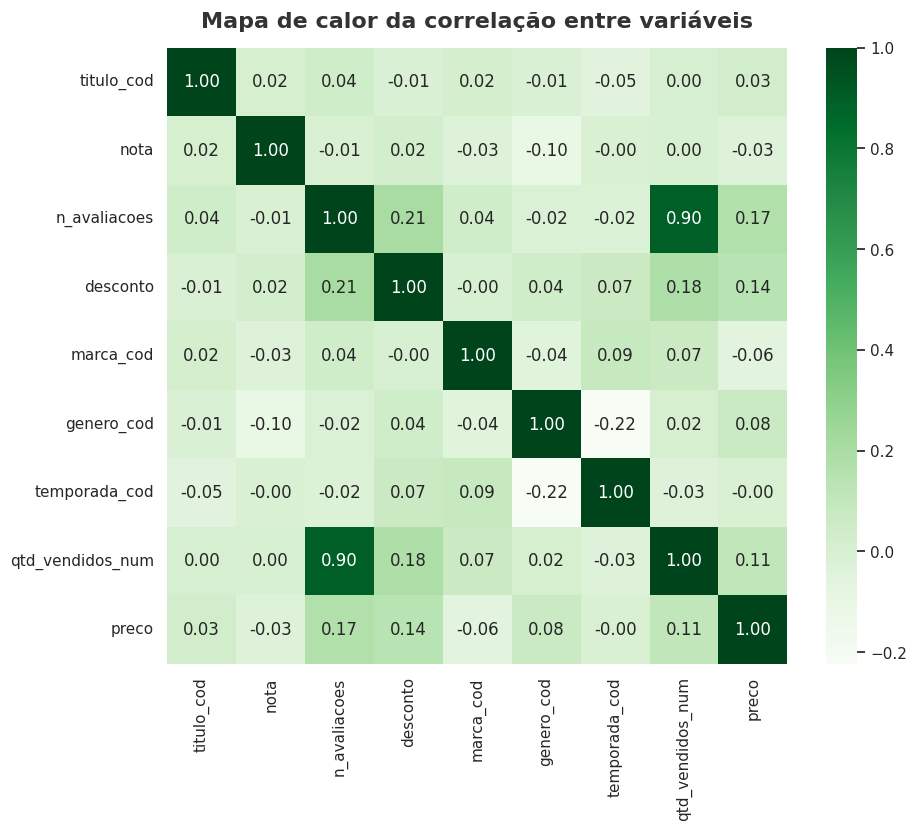

In [86]:
# Mapa de calor
df_correlacao = df[
    [
        'titulo_cod', 'nota', 'n_avaliacoes', 'desconto',
        'marca_cod', 'genero_cod', 'temporada_cod',
        'qtd_vendidos_num', 'preco'
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.heatmap(df_correlacao, annot=True, fmt='.2f', cmap='Greens')
plt.title('Mapa de calor da correlação entre variáveis', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.show()

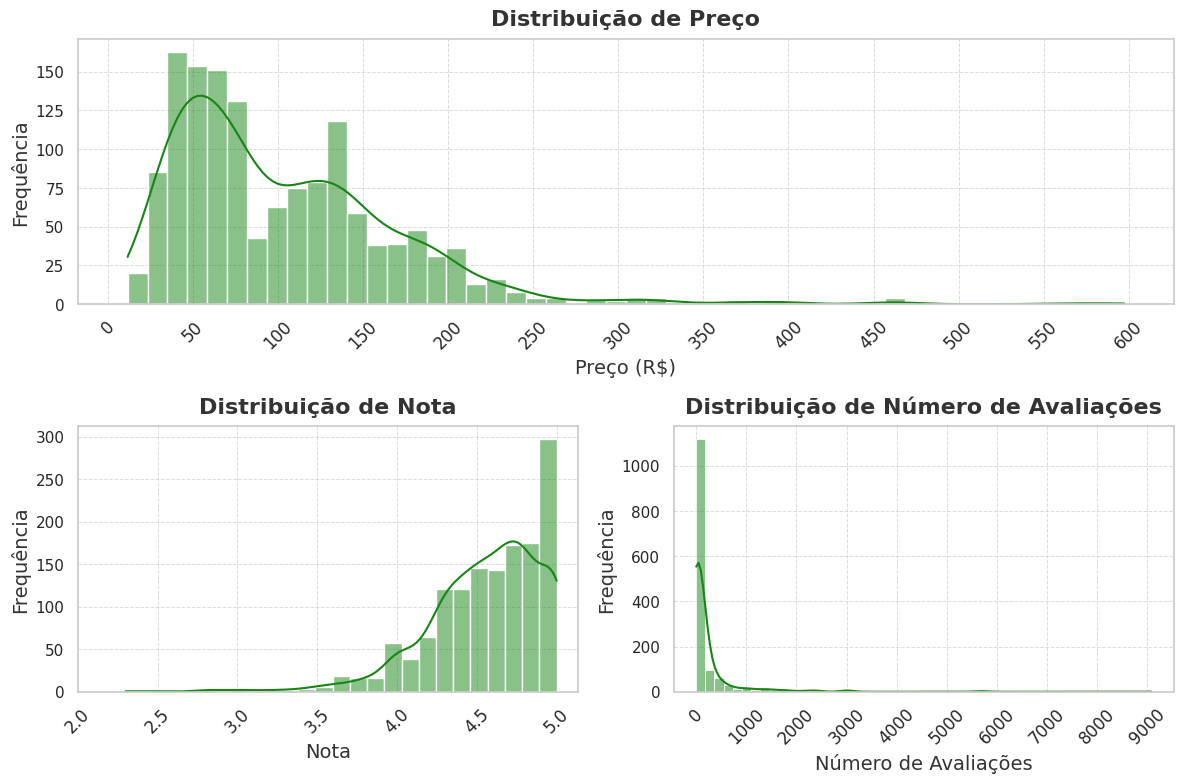

In [87]:
# Histograma
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Preço
plt.subplot(2, 1, 1)
sns.histplot(data=df, x='preco', kde=True, bins=50, color='#178515', edgecolor='white', alpha=0.5)
plt.title('Distribuição de Preço', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Preço (R$)', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Frequência', fontsize=14, fontweight='medium', color='#333')
plt.xticks(ticks=range(0, int(df['preco'].max()) + 50, 50), rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Nota
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='nota', kde=True, bins=25, color='#178515', edgecolor='white', alpha=0.5)
plt.title('Distribuição de Nota', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Nota', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Frequência', fontsize=14, fontweight='medium', color='#333')
plt.xticks(ticks=np.arange(2, df['nota'].max() + 0.5, 0.5), rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Número de avaliações
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='n_avaliacoes', kde=True, bins=50, color='#178515', edgecolor='white', alpha=0.5)
plt.title('Distribuição de Número de Avaliações', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Número de Avaliações', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Frequência', fontsize=14, fontweight='medium', color='#333')
plt.xticks(ticks=range(0, int(df['n_avaliacoes'].max()) + 500, 1000), rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


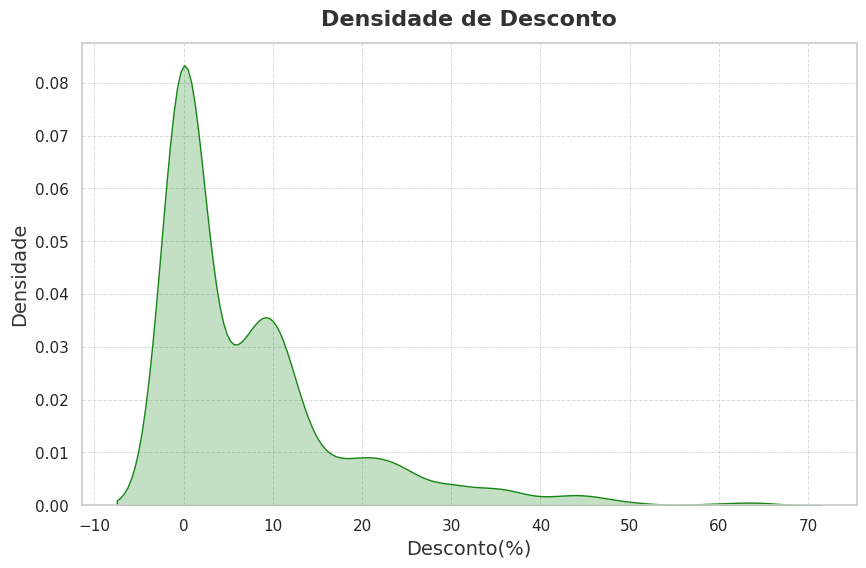

In [88]:
# Gráfico de densidade
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Desconto
sns.kdeplot(df['desconto'], fill=True, color='#178515')
plt.title('Densidade de Desconto', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Desconto(%)', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Densidade', fontsize=14, fontweight='medium', color='#333')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

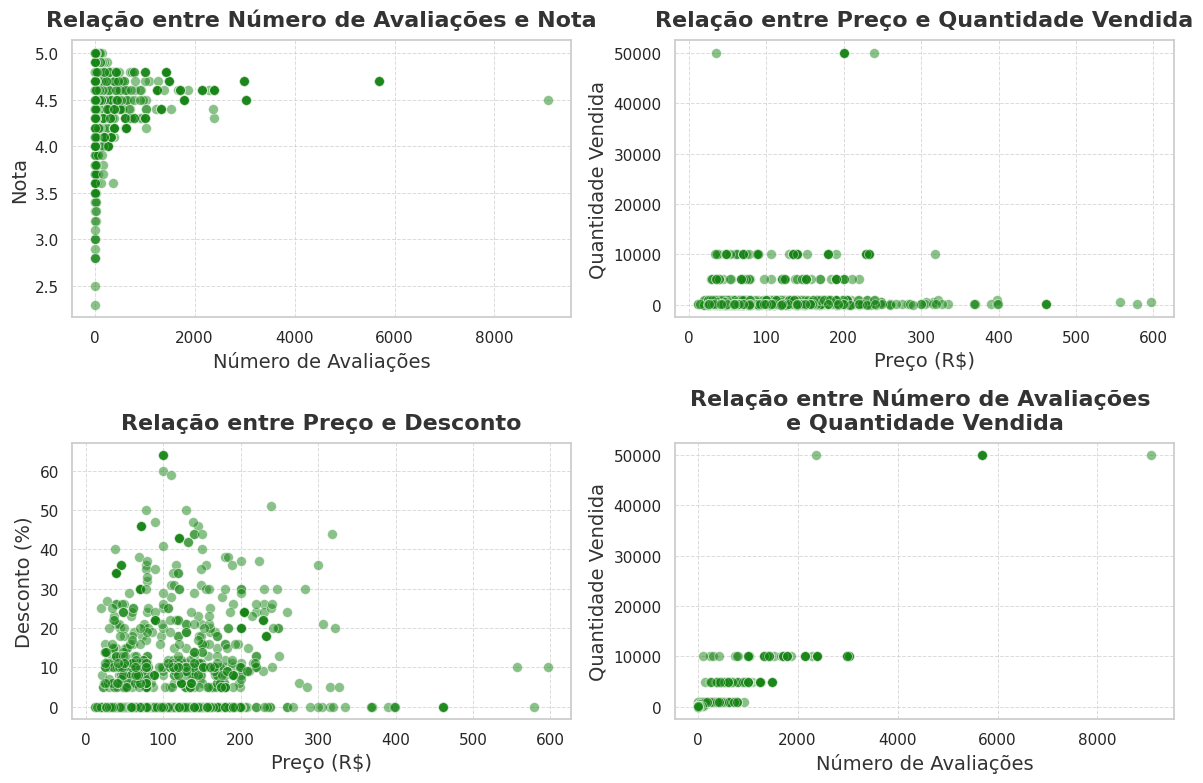

In [89]:
# Gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Número de avaliações vs nota
plt.subplot(2, 2, 1)
sns.scatterplot(x='n_avaliacoes', y='nota', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Número de Avaliações e Nota', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Número de Avaliações', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Nota', fontsize=14, fontweight='medium', color='#333')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Preço vs quantidade vendidos
plt.subplot(2, 2, 2)
sns.scatterplot(x='preco', y='qtd_vendidos_num', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Preço e Quantidade Vendida', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Preço (R$)', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Quantidade Vendida', fontsize=14, fontweight='medium', color='#333')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Preço vs desconto
plt.subplot(2, 2, 3)
sns.scatterplot(x='preco', y='desconto', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Preço e Desconto', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Preço (R$)', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Desconto (%)', fontsize=14, fontweight='medium', color='#333')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

# Número de avaliações vs quantidade vendida
plt.subplot(2, 2, 4)
sns.scatterplot(x='n_avaliacoes', y='qtd_vendidos_num', data=df, s=50, alpha=0.5, color='#178515')
plt.title('Relação entre Número de Avaliações \ne Quantidade Vendida', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Número de Avaliações', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Quantidade Vendida', fontsize=14, fontweight='medium', color='#333')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

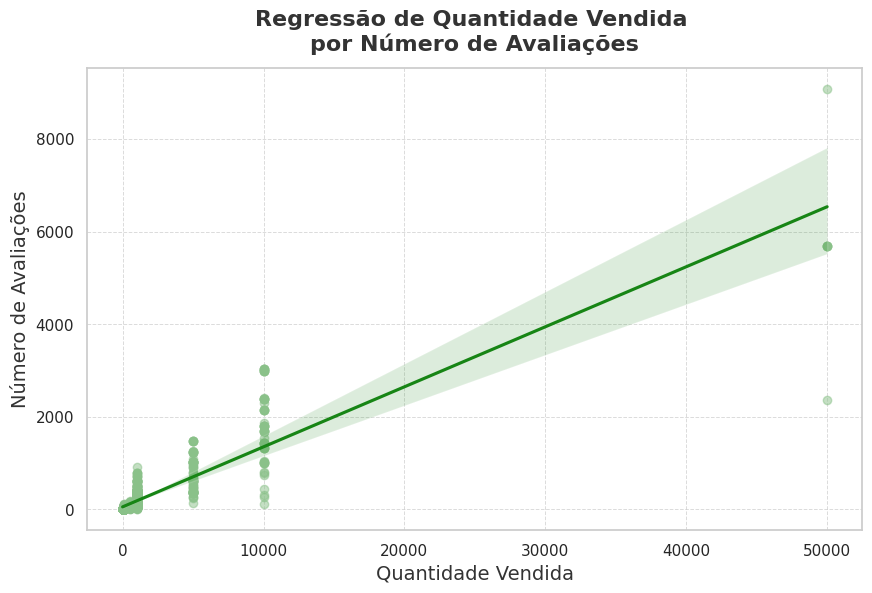

In [90]:
# Gráfico de Regressão
# Quantidade vendida vs número de avaliações
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.regplot(x='qtd_vendidos_num', y='n_avaliacoes', data=df, color='#178515', scatter_kws={'alpha': 0.5, 'color': '#8ac189'})
plt.title('Regressão de Quantidade Vendida \npor Número de Avaliações', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Quantidade Vendida', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Número de Avaliações', fontsize=14, fontweight='medium', color='#333')
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

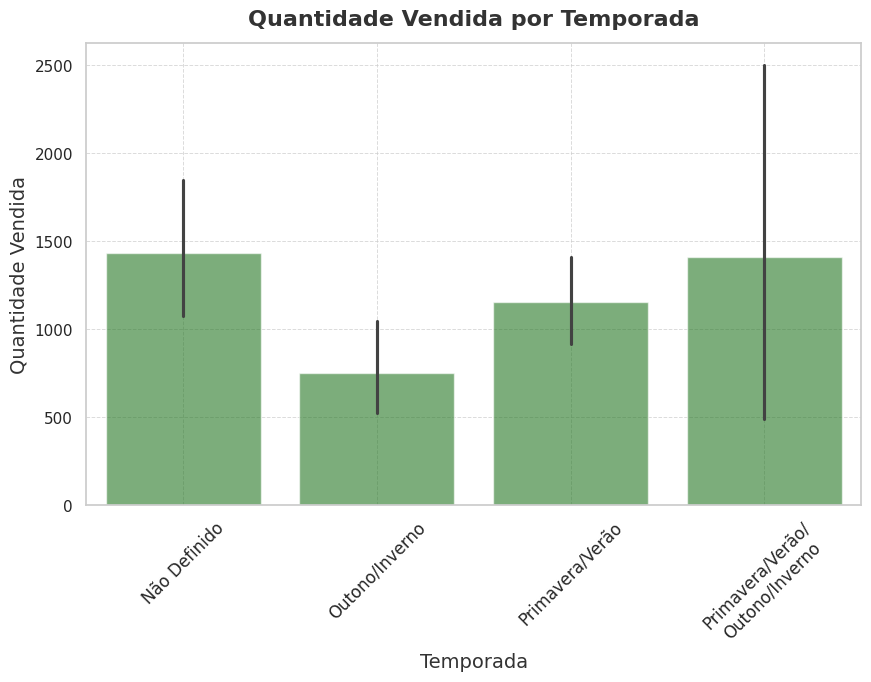

In [91]:
# Gráfico de barras
# Temporada vs quantidade vendida
substituicoes_temp = {
    'primavera/verao/outono/inverno': 'Primavera/Verão/\nOutono/Inverno',
    'primavera/verao': 'Primavera/Verão',
    'outono/inverno': 'Outono/Inverno',
    'nao definido': 'Não Definido'
}
df['substituicoes_temp'] = df['temporada'].apply(lambda x: substituicoes_temp.get(x, x))

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=df, x='substituicoes_temp', y='qtd_vendidos_num', color='#178515', alpha=0.6)
plt.title('Quantidade Vendida por Temporada', fontsize=16, fontweight='bold', color='#333', y=1.02)
plt.xlabel('Temporada', fontsize=14, fontweight='medium', color='#333')
plt.ylabel('Quantidade Vendida', fontsize=14, fontweight='medium', color='#333')
plt.xticks(rotation=45, fontsize=12)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Remove coluna 'substituicoes_temp' do DataFrame
df.drop(columns='substituicoes_temp', inplace=True)

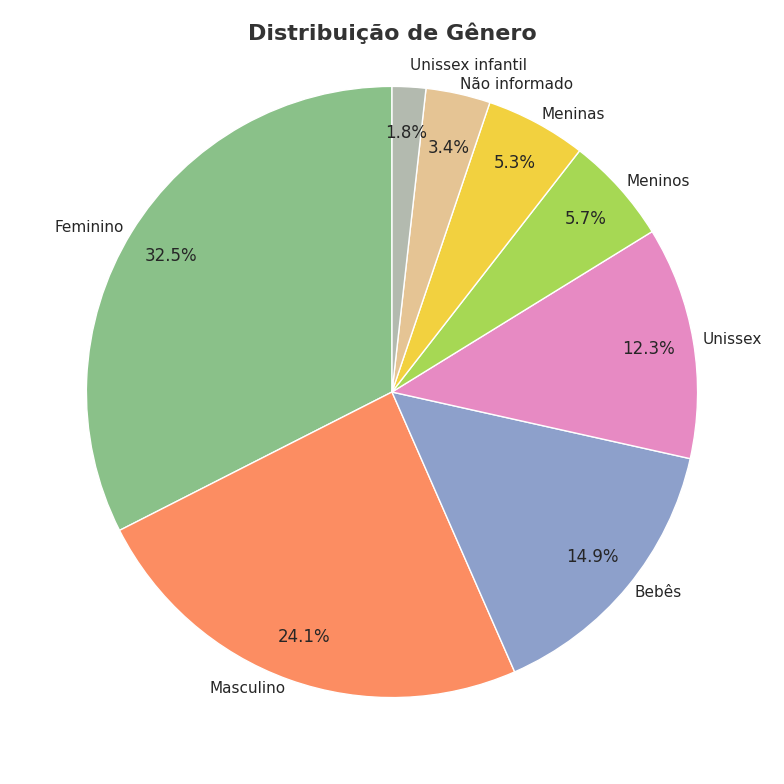

In [92]:
# Gráfico de pizza
colors = '#8ac189', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#f2d13f', '#e5c494', '#b3baaf'

# Gênero
labels = df['genero'].value_counts().index.str.capitalize()
# Alterar rótulos com acento
labels = labels.to_list()
labels[labels.index('Bebes')] = 'Bebês'
labels[labels.index('Nao informado')] = 'Não informado'

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
patches, texts, autotexts = plt.pie(
    df['genero'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    pctdistance=0.85,  # Afastamento do percentual
    labeldistance=1.03, # Afastamento dos rótulos
    startangle=90,
    colors=colors,
)
texts[7]._y =+1.07  # Altera manualmente a posição de rótulo sobreposto
autotexts[6]._y =0.8  # Altera manualmente a posição de porcentagem sobreposta
plt.title('Distribuição de Gênero', fontsize=16, fontweight='bold', color='#333', y=0.95)
plt.tight_layout()
plt.show()
